<a href="https://colab.research.google.com/github/GulchinTaghizade/ASP.Net/blob/main/GroupWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Inspect the Dataset**

In [15]:
import pandas as pd

# Load the dataset
worldwide_data = pd.read_csv('worldwide.csv')

# Inspect the first few rows and data types
print(worldwide_data.head())
print(worldwide_data.dtypes)

       Week  Technology: (Worldwide)  Health: (Worldwide)  Sports: (Worldwide)
0   11/3/19                       15                   67                   74
1  11/10/19                       15                   66                   67
2  11/17/19                       15                   66                   67
3  11/24/19                       14                   53                   76
4   12/1/19                       15                   61                   72
Week                       object
Technology: (Worldwide)     int64
Health: (Worldwide)         int64
Sports: (Worldwide)         int64
dtype: object


**Clean the Data**

In [16]:
worldwide_data['Week'] = pd.to_datetime(worldwide_data['Week']) #Convert the Week Column

<ipython-input-16-b31a5bd89132>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  worldwide_data['Week'] = pd.to_datetime(worldwide_data['Week']) #Convert the Week Column


Analyze Trends

Visualize Search Trends Over Time

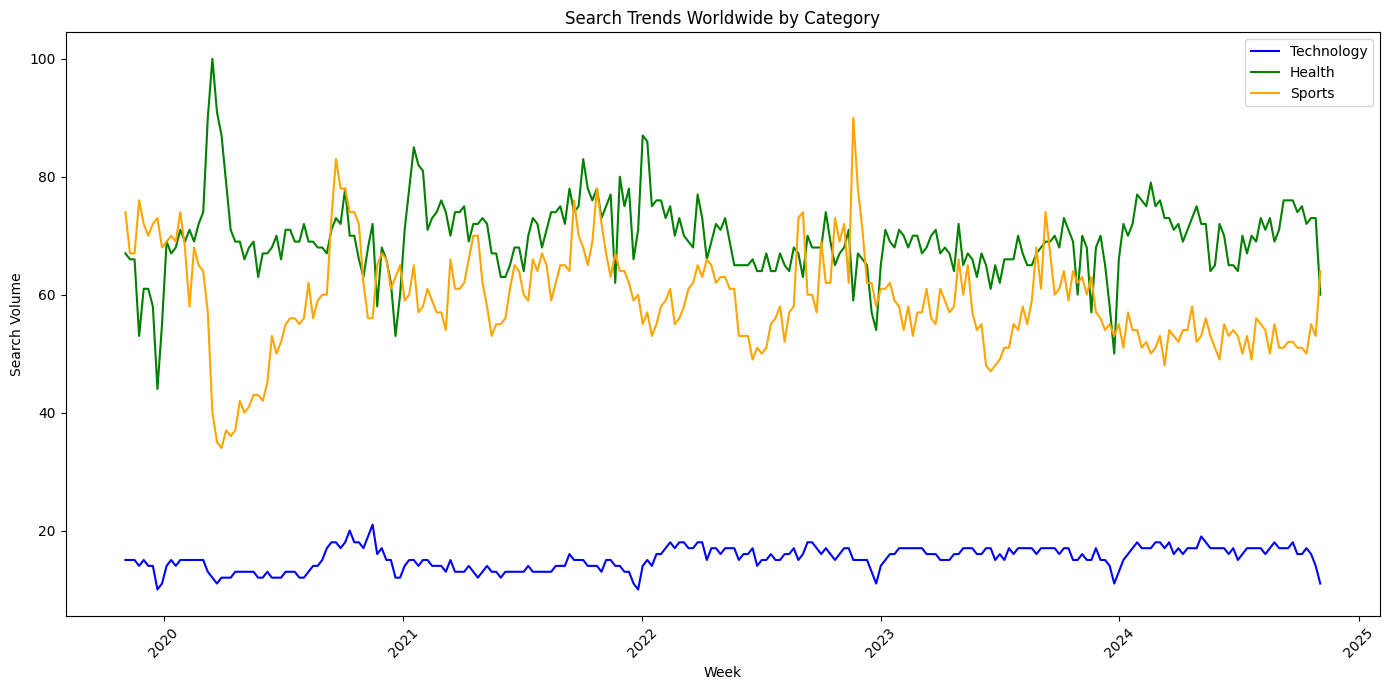

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(worldwide_data['Week'], worldwide_data['Technology: (Worldwide)'], label='Technology', color='blue')
plt.plot(worldwide_data['Week'], worldwide_data['Health: (Worldwide)'], label='Health', color='green')
plt.plot(worldwide_data['Week'], worldwide_data['Sports: (Worldwide)'], label='Sports', color='orange')

plt.title('Search Trends Worldwide by Category')
plt.xlabel('Week')
plt.ylabel('Search Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Identify Seasonal Patterns

<Figure size 1200x600 with 0 Axes>

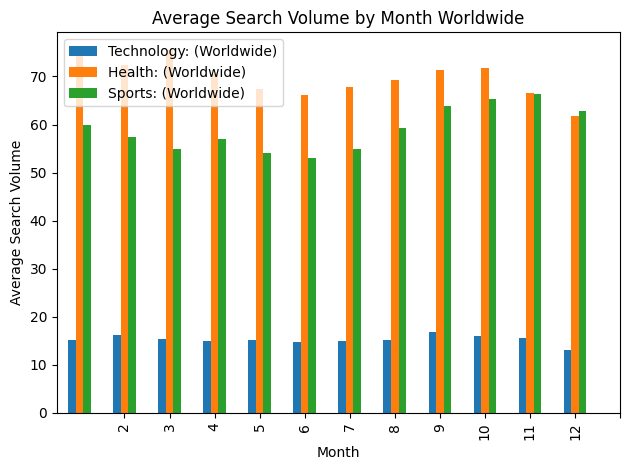

In [18]:
worldwide_data['Month'] = worldwide_data['Week'].dt.month
monthly_trends = worldwide_data.groupby('Month')[['Technology: (Worldwide)', 'Health: (Worldwide)', 'Sports: (Worldwide)']].mean()

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar')
plt.title('Average Search Volume by Month Worldwide')
plt.xlabel('Month')
plt.ylabel('Average Search Volume')
plt.xticks(monthly_trends.index)
plt.tight_layout()
plt.show()

From the analyzed data, we can see that the Health category has the highest search volume.

Calculate Basic Statistics

In [19]:
# Getting descriptive statistics for each category
stats = worldwide_data[['Technology: (Worldwide)', 'Health: (Worldwide)', 'Sports: (Worldwide)']].describe()
print(stats)

       Technology: (Worldwide)  Health: (Worldwide)  Sports: (Worldwide)
count               262.000000           262.000000           262.000000
mean                 15.255725            69.557252            59.091603
std                   1.947458             6.296213             8.483882
min                  10.000000            44.000000            34.000000
25%                  14.000000            66.000000            54.000000
50%                  15.000000            69.000000            58.500000
75%                  17.000000            73.000000            64.000000
max                  21.000000           100.000000            90.000000


In [20]:
technology_stats = {
    'Max': worldwide_data['Technology: (Worldwide)'].max(),
    'Min': worldwide_data['Technology: (Worldwide)'].min(),
    'Average': worldwide_data['Technology: (Worldwide)'].mean()
}

health_stats = {
    'Max': worldwide_data['Health: (Worldwide)'].max(),
    'Min': worldwide_data['Health: (Worldwide)'].min(),
    'Average': worldwide_data['Health: (Worldwide)'].mean()
}

sports_stats = {
    'Max': worldwide_data['Sports: (Worldwide)'].max(),
    'Min': worldwide_data['Sports: (Worldwide)'].min(),
    'Average': worldwide_data['Sports: (Worldwide)'].mean()
}

print("Technology Stats:", technology_stats)
print("Health Stats:", health_stats)
print("Sports Stats:", sports_stats)

Technology Stats: {'Max': 21, 'Min': 10, 'Average': 15.255725190839694}
Health Stats: {'Max': 100, 'Min': 44, 'Average': 69.55725190839695}
Sports Stats: {'Max': 90, 'Min': 34, 'Average': 59.091603053435115}


Summary DataFrame

In [21]:
summary_stats = pd.DataFrame({
    'Max': [technology_stats['Max'], health_stats['Max'], sports_stats['Max']],
    'Min': [technology_stats['Min'], health_stats['Min'], sports_stats['Min']],
    'Average': [technology_stats['Average'], health_stats['Average'], sports_stats['Average']]
}, index=['Technology', 'Health', 'Sports'])

print(summary_stats)

            Max  Min    Average
Technology   21   10  15.255725
Health      100   44  69.557252
Sports       90   34  59.091603


In [22]:
# Load your new dataset
data = pd.read_csv('geomap.csv')  # Adjust filename as necessary

# Inspect the first few rows and the data types
print(data.head())
print(data.dtypes)

                             Country Technology: (03/11/2019 - 03/11/2024)  \
0                        South Sudan                                    5%   
1                           Eswatini                                   11%   
2                            Ireland                                    3%   
3  Falkland Islands (Islas Malvinas)                                    3%   
4                             Uganda                                    7%   

  Health: (03/11/2019 - 03/11/2024) Sports: (03/11/2019 - 03/11/2024)  
0                               21%                               74%  
1                               26%                               63%  
2                               27%                               70%  
3                               24%                               73%  
4                               31%                               62%  
Country                                  object
Technology: (03/11/2019 - 03/11/2024)    object
Hea

Clean the Data

In [25]:
# Clean column names
data.columns = ['Country', 'Technology', 'Health', 'Sports']

# Remove the '%' and convert to float
for column in ['Technology', 'Health', 'Sports']:
    data[column] = data[column].str.rstrip('%').astype(float) / 100  # Convert to decimal

# Check the cleaned data types

print(data.dtypes)

Country        object
Technology    float64
Health        float64
Sports        float64
dtype: object


Check for Missing Values

In [28]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

Country         0
Technology     20
Health         16
Sports         17
Tech Rank      20
Health Rank    16
Sports Rank    17
dtype: int64


In [30]:
# Remove rows with NaN values
cleaned_data = data.dropna()

Analyze Search Trends by Country
Rank Countries

In [31]:
# If you filled or dropped NaN values, use the cleaned data for ranking
cleaned_data['Tech Rank'] = cleaned_data['Technology'].rank(ascending=False)
cleaned_data['Health Rank'] = cleaned_data['Health'].rank(ascending=False)
cleaned_data['Sports Rank'] = cleaned_data['Sports'].rank(ascending=False)

# Display the ranked data
print(cleaned_data[['Country', 'Technology', 'Tech Rank', 'Health', 'Health Rank', 'Sports', 'Sports Rank']])

                               Country  Technology  Tech Rank  Health  \
0                          South Sudan        0.05      215.5    0.21   
1                             Eswatini        0.11      154.0    0.26   
2                              Ireland        0.03      225.5    0.27   
3    Falkland Islands (Islas Malvinas)        0.03      225.5    0.24   
4                               Uganda        0.07      196.0    0.31   
..                                 ...         ...        ...     ...   
229                         Tajikistan        0.22       33.0    0.37   
230                            Ukraine        0.21       39.0    0.41   
231                            Belarus        0.22       33.0    0.38   
232                               Iran        0.30        4.0    0.40   
233                              Japan        0.26       12.5    0.35   

     Health Rank  Sports  Sports Rank  
0          200.0    0.74         24.0  
1          182.5    0.63         41.0  
2  

<ipython-input-31-6197f2f2fd9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Tech Rank'] = cleaned_data['Technology'].rank(ascending=False)
<ipython-input-31-6197f2f2fd9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Health Rank'] = cleaned_data['Health'].rank(ascending=False)
<ipython-input-31-6197f2f2fd9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Visualize Comparisons

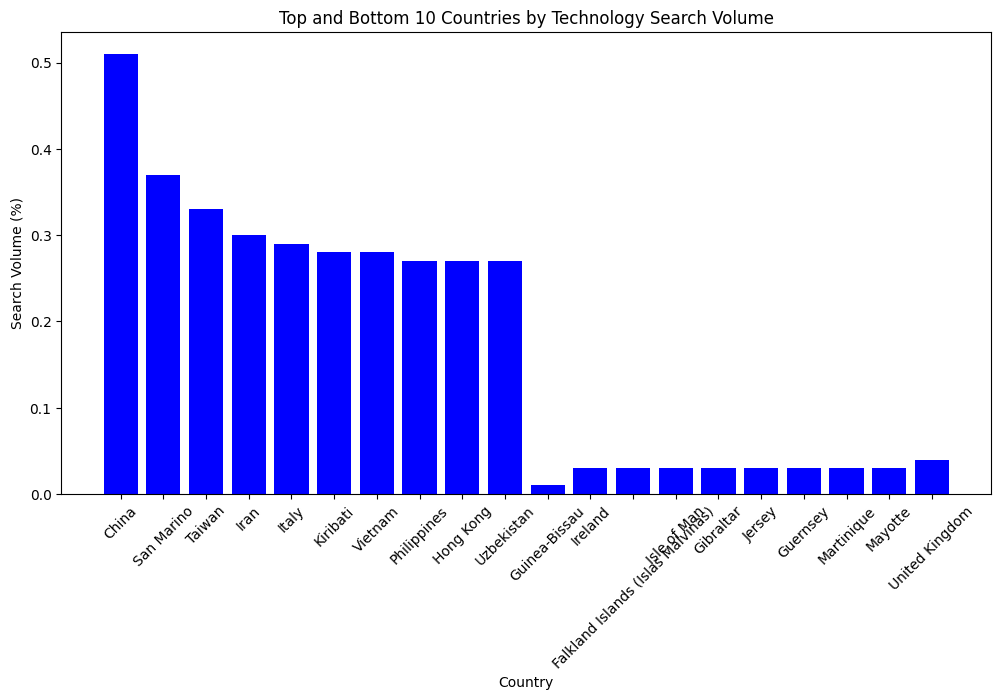

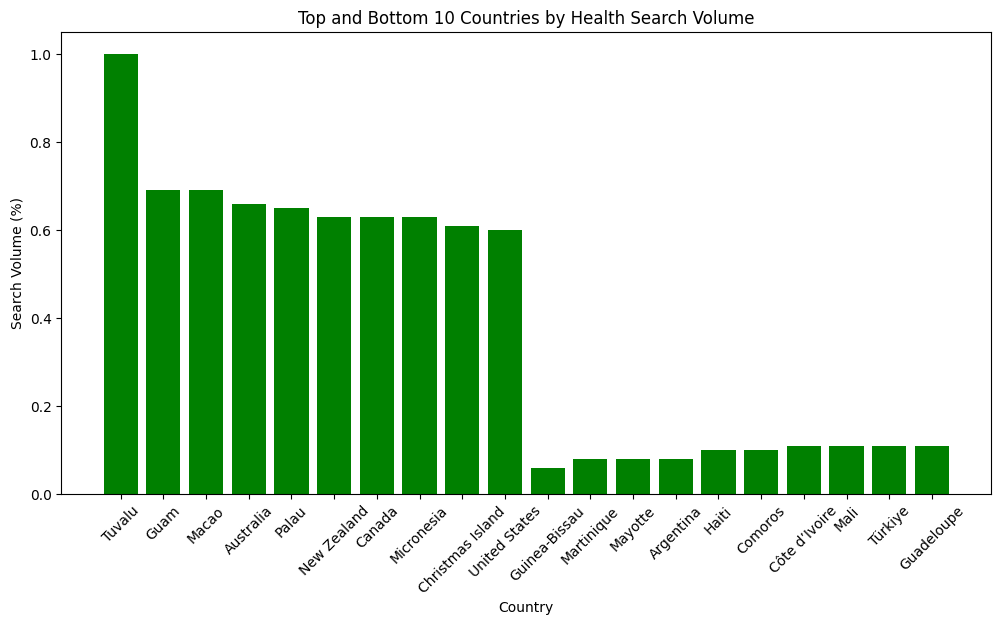

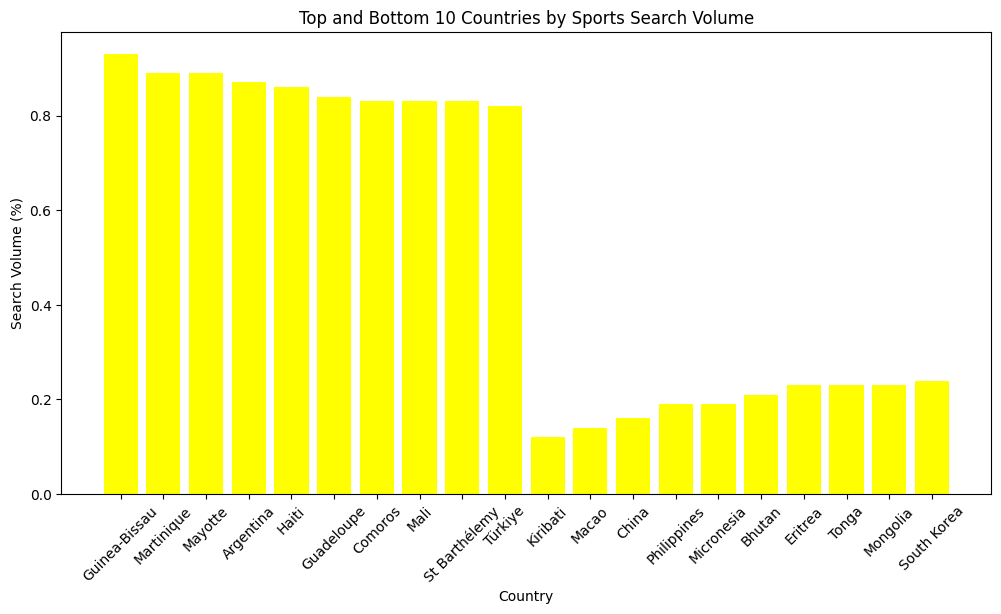

In [38]:
# Select top 10 and bottom 10 countries by Technology search volume
top_countries = data.nlargest(10, 'Technology')
bottom_countries = data.nsmallest(10, 'Technology')
filtered_data = pd.concat([top_countries, bottom_countries])

# Bar chart for Technology
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['Country'], filtered_data['Technology'], color='blue')
plt.title('Top and Bottom 10 Countries by Technology Search Volume')
plt.xlabel('Country')
plt.ylabel('Search Volume (%)')
plt.xticks(rotation=45)
plt.show()

# Select top 10 and bottom 10 countries by Health search volume
top_countries = data.nlargest(10, 'Health')
bottom_countries = data.nsmallest(10, 'Health')
filtered_data = pd.concat([top_countries, bottom_countries])

# Bar chart for Health
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['Country'], filtered_data['Health'], color='green')
plt.title('Top and Bottom 10 Countries by Health Search Volume')
plt.xlabel('Country')
plt.ylabel('Search Volume (%)')
plt.xticks(rotation=45)
plt.show()

# Select top 10 and bottom 10 countries by Sports search volume
top_countries = data.nlargest(10, 'Sports')
bottom_countries = data.nsmallest(10, 'Sports')
filtered_data = pd.concat([top_countries, bottom_countries])

# Bar chart for Sports
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['Country'], filtered_data['Sports'], color='yellow')
plt.title('Top and Bottom 10 Countries by Sports Search Volume')
plt.xlabel('Country')
plt.ylabel('Search Volume (%)')
plt.xticks(rotation=45)
plt.show()